# Perceptron code implementation in Python using PyTorch.

Check out this artcile on my blog [100 Days of Deep Learning](https://nandeshwar.in/100-days-of-deep-learning/perceptrons-in-python-from-scratch-code/).

The very first thing we need to create a Perceptron implementation is a dataset. We use the amazing Scikit Learn library to create a custom dataset.
Do bear in mind that Perceptron can only do binary classification that is why create a dataset in such a manner.

In [1]:
import torch

from sklearn import datasets
from matplotlib import pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Binary data')

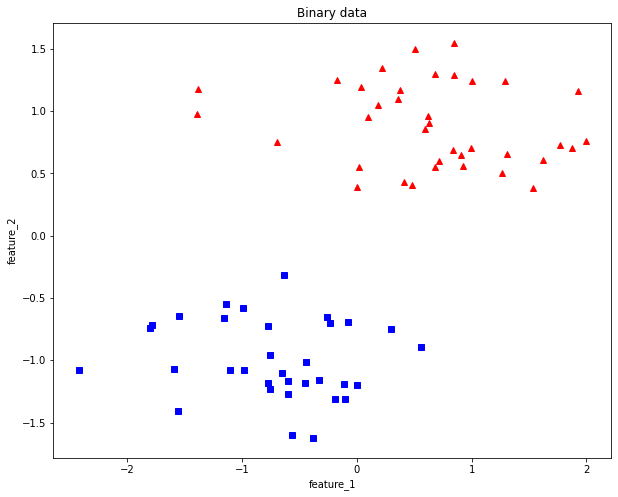

In [2]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=6)
X = torch.from_numpy(X)
y = torch.from_numpy(y)

# Split the dataset
X_train, X_test = X[:70], X[70:]
y_train, y_test = y[:70], y[70:]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

fig = plt.figure(figsize=(10, 8))

plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'r^')
plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'bs')
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title('Binary data')

In [3]:
print('Feature count', torch.bincount(y))
print('X shape:', X.shape)
print('y shape:', y.shape)

Feature count tensor([50, 50])
X shape: torch.Size([100, 2])
y shape: torch.Size([100])


In [4]:
def custom_where(cond, x_1, x_2):
    return (cond * x_1) + (~(cond) * x_2)

class Perceptron():
    def __init__(self, num_features: int):
        self.num_features = 2
        self.weights = torch.zeros(num_features, 1, dtype=torch.float32)
        self.bias = torch.zeros(1, dtype=torch.float32)
    
    def forward(self, x):
        linear = torch.add(torch.mm(x, self.weights), self.bias)
        predictions = custom_where(linear > 0., 1, 0).float()
        return predictions
        
    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors
    
    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(y.size()[0]):
                errors = self.backward(x[i].view(1, self.num_features), y[i]).view(-1)
                self.weights += (errors * x[i]).view(self.num_features, 1)
                self.bias = errors
                    
    def evaluate(self, x, y):
        predictions = self.forward(x).view(-1)
        accuracy = torch.sum(predictions == y).float() / y.size()[0]
        return accuracy

In [5]:
ppn = Perceptron(num_features=2)

X_train_tensor = X_train.clone().detach().type(torch.FloatTensor).to('cpu')
y_train_tensor = y_train.clone().detach().type(torch.FloatTensor).to('cpu')

ppn.train(X_train_tensor, y_train_tensor, epochs=5)

print('Model parameters:')
print('  Weights: %s' % ppn.weights)
print('  Bias: %s' % ppn.bias)

Model parameters:
  Weights: tensor([[-0.2096],
        [-2.2456]])
  Bias: tensor([0.])


In [6]:
X_test_tensor = X_test.clone().detach().type(torch.FloatTensor).to('cpu')
y_test_tensor = y_test.clone().detach().type(torch.FloatTensor).to('cpu')

test_acc = ppn.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


/home/iso-9/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:171: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/iso-9/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


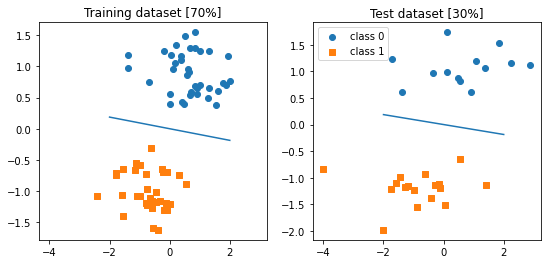

In [7]:
##########################
### 2D Decision Boundary
##########################

w, b = ppn.weights, ppn.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(9, 4))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[0].title.set_text('Training dataset [70%]')
ax[1].plot([x_min, x_max], [y_min, y_max])
ax[1].title.set_text('Test dataset [30%]')

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()

Check out this artcile on my blog [100 Days of Deep Learning](https://nandeshwar.in/100-days-of-deep-learning/perceptrons-in-python-from-scratch-code/).